# The BayWheels Trip Data
## by Alanoud Almutairi

## Preliminary Wrangling

> The data is information about a bike renting app, this data provides infomation like the age of the user, duration of the use, gender of the user, and more. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201905-baywheels-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,48877,2019-05-31 20:34:56.8110,2019-06-01 10:09:34.7960,321.0,5th St at Folsom,37.780146,-122.403071,60.0,8th St at Ringold St,37.774520,-122.409449,1416,Customer,1990.0,Female,No
1,47050,2019-05-31 19:43:56.1960,2019-06-01 08:48:06.9190,246.0,Berkeley Civic Center,37.869060,-122.270556,266.0,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,1994.0,Male,No
2,5912,2019-05-31 23:54:24.0890,2019-06-01 01:32:56.9820,149.0,Emeryville Town Hall,37.831275,-122.285633,149.0,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,1988.0,Male,No
3,2629,2019-05-31 23:59:57.4490,2019-06-01 00:43:46.8740,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,1998.0,Male,No
4,4235,2019-05-31 23:05:48.9320,2019-06-01 00:16:24.4570,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,368.0,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,1967.0,Male,No


In [3]:
df.shape # To check the number of columns and records

(182163, 16)

In [4]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [5]:
df.info() #found some null values that can not be filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182163 entries, 0 to 182162
Data columns (total 16 columns):
duration_sec               182163 non-null int64
start_time                 182163 non-null object
end_time                   182163 non-null object
start_station_id           182148 non-null float64
start_station_name         182148 non-null object
start_station_latitude     182163 non-null float64
start_station_longitude    182163 non-null float64
end_station_id             182148 non-null float64
end_station_name           182148 non-null object
end_station_latitude       182163 non-null float64
end_station_longitude      182163 non-null float64
bike_id                    182163 non-null int64
user_type                  182163 non-null object
member_birth_year          173694 non-null float64
member_gender              173697 non-null object
bike_share_for_all_trip    182163 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.2+ MB


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,182163.000000,182148.000000,182163.000000,182163.000000,182148.000000,182163.000000,182163.000000,182163.000000,173694.000000
mean,792.261744,141.369480,37.763583,-122.346701,139.308118,37.763770,-122.345875,1964.698753,1984.383260
std,1824.190023,117.435373,0.112150,0.129110,117.210619,0.111985,0.128349,1136.197266,10.299198
min,61.000000,3.000000,37.311284,-122.453704,3.000000,37.311284,-122.453704,12.000000,1896.000000
25%,357.000000,44.000000,37.770030,-122.411738,42.000000,37.770407,-122.410662,1025.000000,1980.000000
50%,568.000000,101.000000,37.780526,-122.397437,98.000000,37.780955,-122.396906,1930.000000,1987.000000
75%,882.000000,240.000000,37.796248,-122.285171,238.000000,37.797280,-122.288665,2977.000000,1992.000000
max,84967.000000,427.000000,37.880222,-121.870099,427.000000,37.880222,-121.870099,7196.000000,2001.000000


In [7]:
df.dropna(inplace = True) # I dropped them

In [8]:
df.info() #chacking the null values removed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173679 entries, 0 to 182162
Data columns (total 16 columns):
duration_sec               173679 non-null int64
start_time                 173679 non-null object
end_time                   173679 non-null object
start_station_id           173679 non-null float64
start_station_name         173679 non-null object
start_station_latitude     173679 non-null float64
start_station_longitude    173679 non-null float64
end_station_id             173679 non-null float64
end_station_name           173679 non-null object
end_station_latitude       173679 non-null float64
end_station_longitude      173679 non-null float64
bike_id                    173679 non-null int64
user_type                  173679 non-null object
member_birth_year          173679 non-null float64
member_gender              173679 non-null object
bike_share_for_all_trip    173679 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.5+ MB


### What is the structure of your dataset?


> The data is csv file. there's 16 columns ('duration_sec', 'start_time', 'end_time', 'start_station_id','start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name','end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender','bike_share_for_all_trip') and 173679 records of data.
### What is/are the main feature(s) of interest in your dataset?

> Getting to know who uses baywheels the most to anwser some questions like.
What gender uses the service the most?
What is the range of ages most users fall in?
What is the subscriber to the non-subscriber ratio in the dataset?

> so the I'm interested in gender, age, and membership


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To get to know who uses baywheels the most is going to be depending on the duration and if he/she Subscriber or not.

## Univariate Exploration


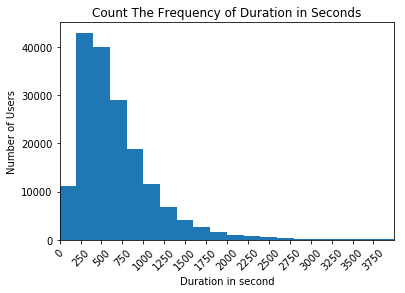

In [26]:
binsize = 200 #set bin size for the plot
ticks = np.arange(0,4000,250) # using ticks to make the x easy to read
bins = np.arange(0, df.duration_sec.max()+binsize, binsize)
plt.hist(df.duration_sec, bins = bins);
plt.xlim(0,4000)
plt.xticks(ticks,rotation = 45);
plt.xlabel('Duration in second')
plt.ylabel('Number of Users')
plt.title('Count The Frequency of Duration in Seconds');

#### We can see here that most of the people around 500 second ~8.3 minutes

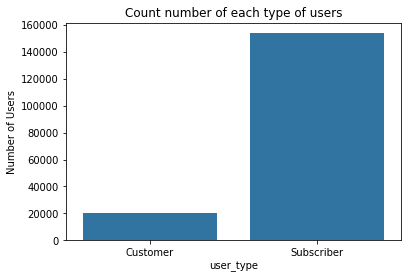

In [22]:
base_color = sb.color_palette()[0] # set a fix color for all plots
sb.countplot(data = df, x = 'user_type', color = base_color);
plt.ylabel('Number of Users')
plt.title('Count Number of Each Type of Users');

#### The majority of the users are subscriber, which is good.

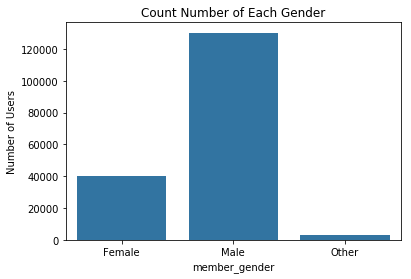

In [27]:
sb.countplot(data = df, x = 'member_gender', color = base_color);
plt.ylabel('Number of Users')
plt.title('Count Number of Each Gender');

#### Majority of the users are male.

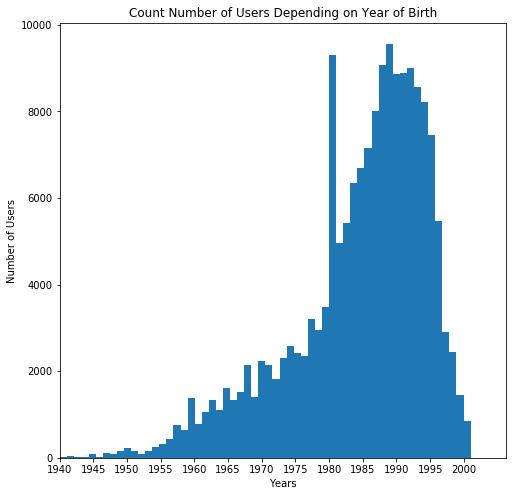

In [29]:
maxsize=2000
ticks = np.arange(1940,maxsize+5,5)
plt.figure(figsize=(8,8))
plt.hist(data= df , x='member_birth_year',bins = 100);
plt.xticks(ticks);
plt.xlim(1940,None);
plt.ylabel('Number of Users')
plt.xlabel('Years')
plt.title('Count Number of Users Depending on Year of Birth');

#### I want to take a closer look so i'll limit more years to get the most frequent users' ages.

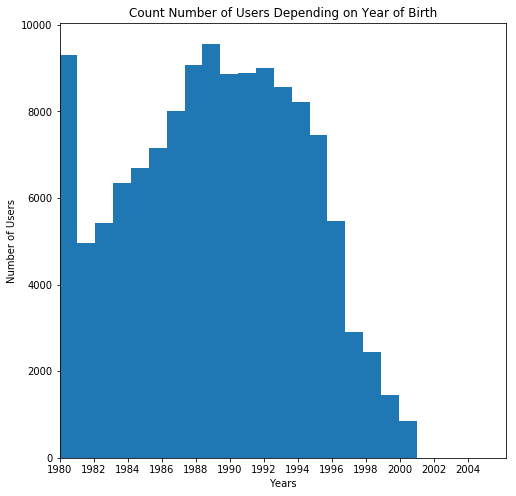

In [30]:
maxsize= 2000
ticks = np.arange(1980,maxsize+5,2)
plt.figure(figsize=(8,8))
plt.hist(data= df , x='member_birth_year',bins = 100);
plt.xticks(ticks);
plt.xlim(1980,None);
plt.ylabel('Number of Users')
plt.xlabel('Years')
plt.title('Count Number of Users Depending on Year of Birth');

#### Most of the users fall between 1987 - 1997 with a spike in the year 1980 (could be the default year on the sign-in page).

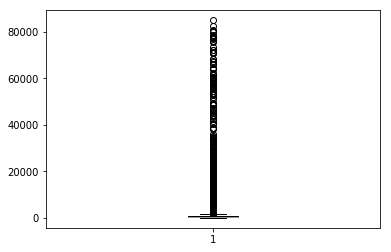

In [31]:
plt.boxplot(df.duration_sec); # exploring the outliers

#### There're alot of outliers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!
The distribution is not normal and, there're alot of outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


> We can see that the ages are sewed to the left, but that's normal since biking requires a physical strength.
> The male to female ratio is not equal, there are more males using the service
> I removed the null values since I can't fill it.

## Bivariate Exploration


Text(0, 0.5, 'Duraiton in second')

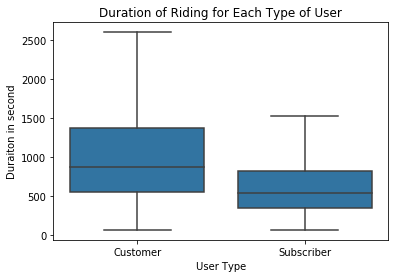

In [37]:
sb.boxplot(data=df,y='duration_sec',x='user_type',showfliers=False,color = base_color); # using the box plot to plot the duration for each user type
plt.title('Duration of Riding for Each Type of User')
plt.xlabel('User Type')
plt.ylabel('Duraiton in second');

Text(0, 0.5, 'Duration in second')

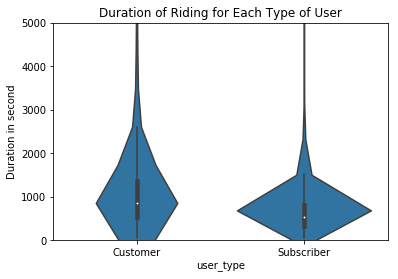

In [38]:
sb.violinplot(data=df,y='duration_sec',x='user_type',color = base_color); # using the violin plot to plot the duration for each user type
plt.ylim(0,5000)
plt.title('Duration of Riding for Each Type of User')
plt.ylabel('Duration in second');

 #### We can see that most of the are subsribers, but they use the service less duration than customer (non-subsribers) 

Text(0.5, 1.0, 'Duration of Riding for Each Gender')

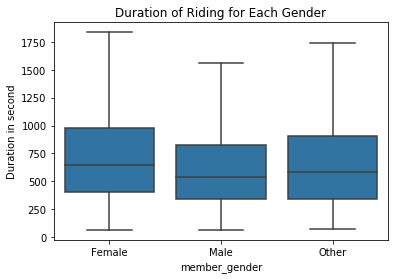

In [39]:
sb.boxplot(data=df,y='duration_sec',x=df.member_gender,showfliers=False,color = base_color); # using the box plot to plot the duration for each gender
plt.ylabel('Duration in second')
plt.title('Duration of Riding for Each Gender');

#### Male users use the serivce more than other.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> What I found intresting is that customers are using the service more than the Subscriber. Males use the service more than others.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No.

## Multivariate Exploration


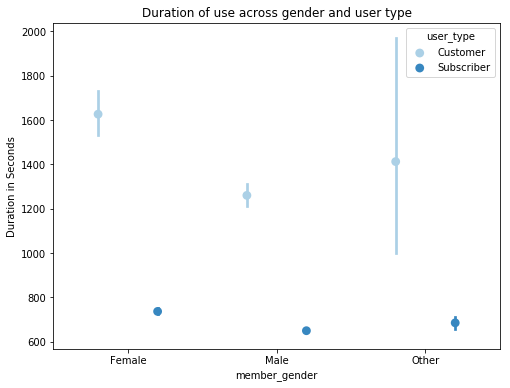

In [40]:
fig = plt.figure(figsize = [8,6]) # using point plot to vizalise the 3 varibles (duration , type of use , gender) relationship
ax = sb.pointplot(data = df, y = 'duration_sec', x = 'member_gender', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('1-carat diamond prices across cut and clarity')
plt.title('Duration of use across gender and user type')
plt.ylabel('Duration in Seconds')
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>I used the 3 varibles (duration , type of use , gender) and plot them to discover that customers use the service with longer duration in all case of genders.
### Were there any interesting or surprising interactions between features?

> What is surprising is that customers use the service with longer duration than subscribers, you think that people that put the effort to subscribe will use the service more than people that are not